<a href="https://colab.research.google.com/github/bijay2051/data/blob/main/DataViz_Presentation_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd

url = 'https://raw.githubusercontent.com/bijay2051/data/main/Diwali%20Sales%20Data.csv'

# Read the CSV data into a pandas DataFrame, specifying the encoding
df = pd.read_csv(url, encoding='latin-1')


In [17]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [18]:

# Display basic statistics
display(df.describe())



,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


1. Demographic Analysis

In [19]:
gender_spending = df.groupby('Gender')['Amount'].sum()
gender_orders = df.groupby('Gender')['Orders'].sum()
print(gender_spending)
print(gender_orders)

Gender
F    74335856.43
M    31913276.00
Name: Amount, dtype: float64
Gender
F    19568
M     8439
Name: Orders, dtype: int64


Age group analysis:<br>
	•	Average amount spent by each age group.<br>
	•	Number of orders placed by each age group.

In [20]:
age_group_spending = df.groupby('Age Group')['Amount'].mean()
age_group_orders = df.groupby('Age Group')['Orders'].sum()
print(age_group_spending)
print(age_group_orders)

Age Group
0-17     9120.449324
18-25    9175.482704
26-35    9384.154138
36-45    9699.954223
46-50    9367.084435
51-55    9953.586747
55+      9557.346604
Name: Amount, dtype: float64
Age Group
0-17       690
18-25     4650
26-35    11398
36-45     5697
46-50     2379
51-55     2116
55+       1077
Name: Orders, dtype: int64


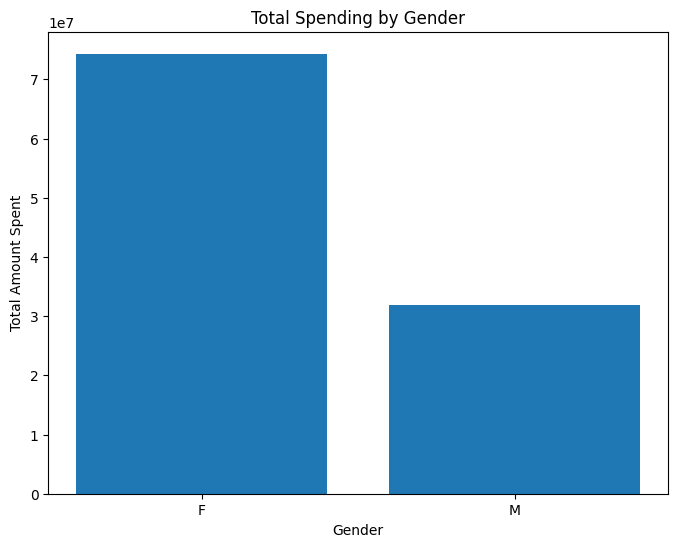

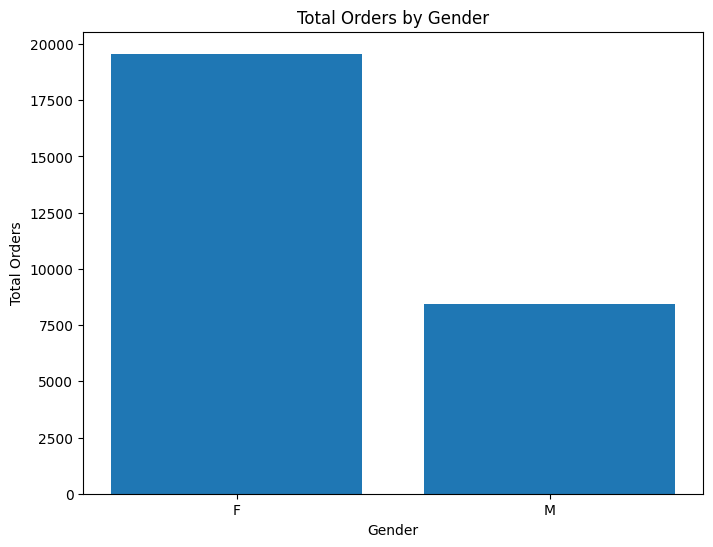

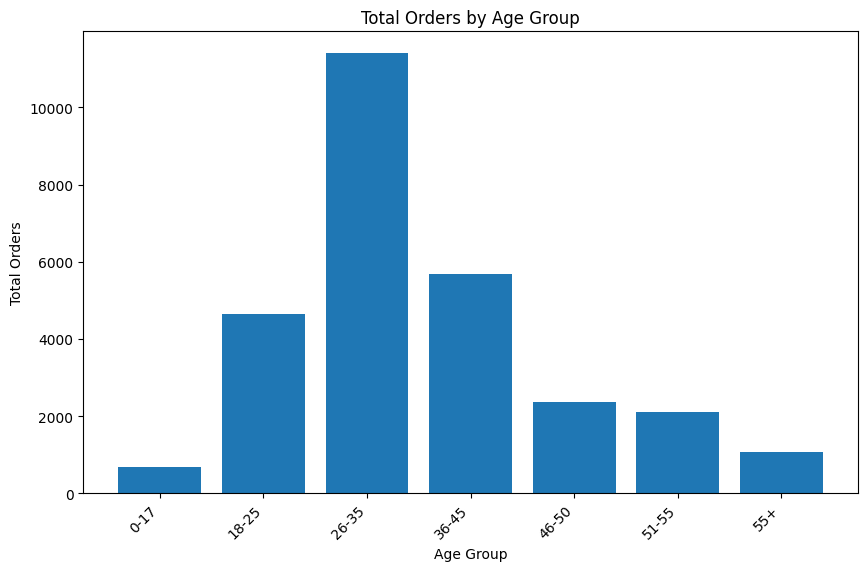

In [21]:

import matplotlib.pyplot as plt

# Visualize Gender Spending
plt.figure(figsize=(8, 6))
plt.bar(gender_spending.index, gender_spending.values)
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent')
plt.title('Total Spending by Gender')
plt.show()

# Visualize Gender Orders
plt.figure(figsize=(8, 6))
plt.bar(gender_orders.index, gender_orders.values)
plt.xlabel('Gender')
plt.ylabel('Total Orders')
plt.title('Total Orders by Gender')
plt.show()


# Visualize Age Group Orders
plt.figure(figsize=(10, 6))
plt.bar(age_group_orders.index, age_group_orders.values)
plt.xlabel('Age Group')
plt.ylabel('Total Orders')
plt.title('Total Orders by Age Group')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


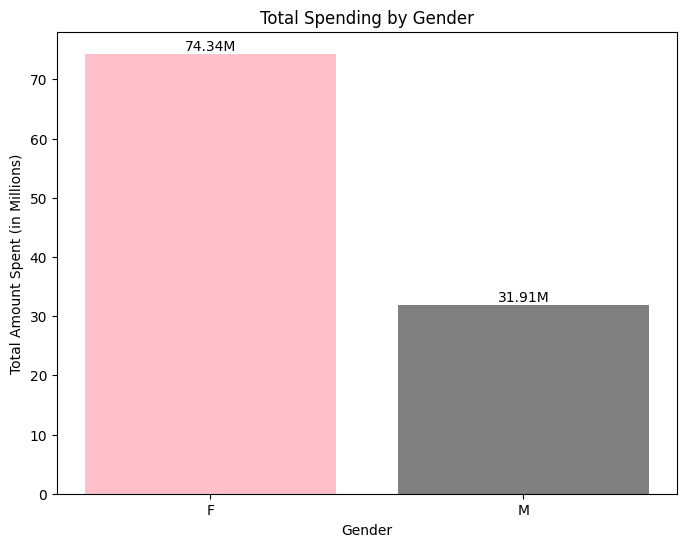

In [22]:

colors = ['pink', 'gray']

# Plot
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_spending.index, gender_spending.values / 1e6, color=colors)  # Convert to millions for plotting
plt.xlabel('Gender')
plt.ylabel('Total Amount Spent (in Millions)')
plt.title('Total Spending by Gender')

# Add values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}M', ha='center', va='bottom')

plt.show()


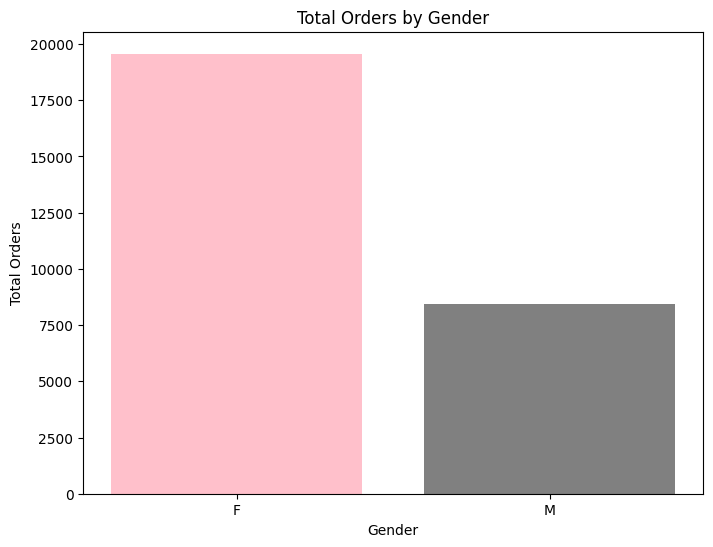

In [30]:
colors = {'F': 'pink', 'M': 'gray'}

# Visualize Gender Orders
plt.figure(figsize=(8, 6))
for gender, group in df.groupby('Gender'):
    plt.bar(gender, group['Orders'].sum(), color=colors.get(gender, 'blue'))
plt.xlabel('Gender')
plt.ylabel('Total Orders')
plt.title('Total Orders by Gender')
plt.show()


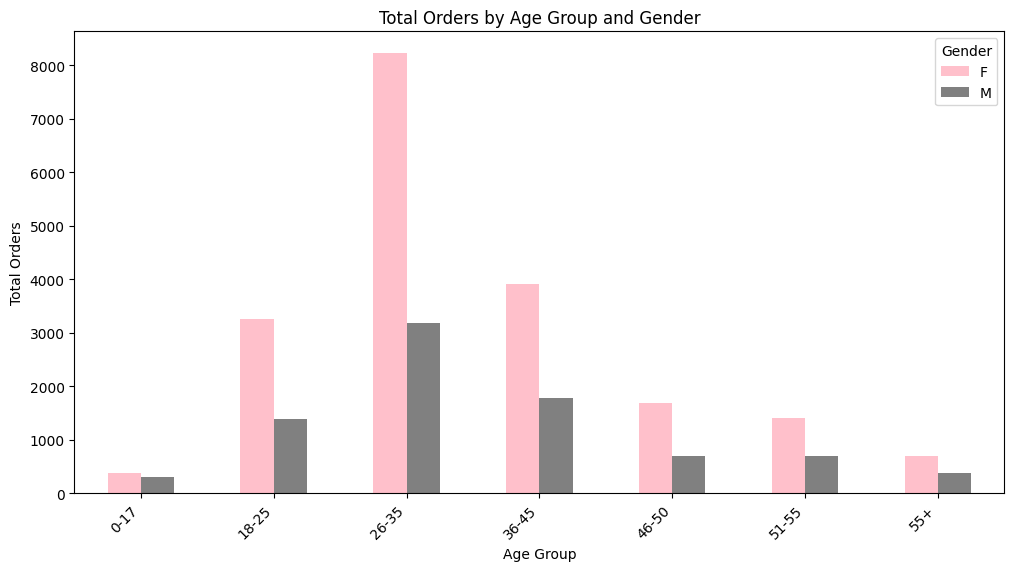

In [36]:
# prompt: clustured bar chart of age group with gender to oder

import matplotlib.pyplot as plt
colors = {'F': 'pink', 'M': 'gray'}

# Group data by Age Group and Gender, then sum the Orders
age_gender_orders = df.groupby(['Age Group', 'Gender'])['Orders'].sum().unstack()

# Create the clustered bar chart
ax = age_gender_orders.plot(kind='bar', figsize=(12, 6),
color=[colors[col] for col in age_gender_orders.columns])

# Customize the chart
plt.xlabel('Age Group')
plt.ylabel('Total Orders')
plt.title('Total Orders by Age Group and Gender')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')

plt.show()


In [29]:
import pandas as pd
import plotly.graph_objects as go

# Create unique labels for nodes (Gender, Marital Status, Age Group, Product Category)
all_labels = pd.concat([df['Gender'], df['Marital_Status'], df['Age Group'], df['Product_Category']]).unique()
labels = list(all_labels)

# Create a mapping from category labels to indices (for nodes)
label_to_index = {label: i for i, label in enumerate(labels)}

# Count the flows from each category to the next
source_target_counts = [
    # Gender to Marital Status
    df.groupby(['Gender', 'Marital_Status']).size().reset_index(name='count'),

    # Marital Status to Age Group
    df.groupby(['Marital_Status', 'Age Group']).size().reset_index(name='count'),

    # Age Group to Product Category
    df.groupby(['Age Group', 'Product_Category']).size().reset_index(name='count')
]

# Extract source-target relationships and counts
sources = []
targets = []
values = []

# Process each flow
for i, (source_col, target_col) in enumerate([('Gender', 'Marital_Status'),
                                              ('Marital_Status', 'Age Group'),
                                              ('Age Group', 'Product_Category')]):
    for _, row in source_target_counts[i].iterrows():
        sources.append(label_to_index[row[source_col]])
        targets.append(label_to_index[row[target_col]])
        values.append(row['count'])

# Dynamically generate colors for nodes and links
import random

# Function to generate random colors
def random_color():
    return 'rgba(' + str(random.randint(0, 255)) + ',' + str(random.randint(0, 255)) + ',' + str(random.randint(0, 255)) + ',0.8)'

# Create color lists
node_colors = [random_color() for _ in labels]
link_colors = [random_color() for _ in sources]

# Create Sankey Diagram with colorful nodes and links
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=node_colors
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color=link_colors  # Use colors for links
    )
))

# Set chart title and layout
fig.update_layout(title_text="Sankey Diagram: Gender to Marital Status to Age Group to Product Category", font_size=10)

# Display the chart
fig.show()

In [38]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import mapclassify


state_counts = df['State'].value_counts().reset_index()
state_counts.columns = ['State', 'Count']


# Load the GeoJSON file of India (you'll need to find one online and adjust the path)
india_map = gpd.read_file('https://raw.githubusercontent.com/Subhash9325/GeoJson-Data-of-Indian-States/refs/heads/master/Indian_States') # Replace with the correct path to your India map GeoJSON file

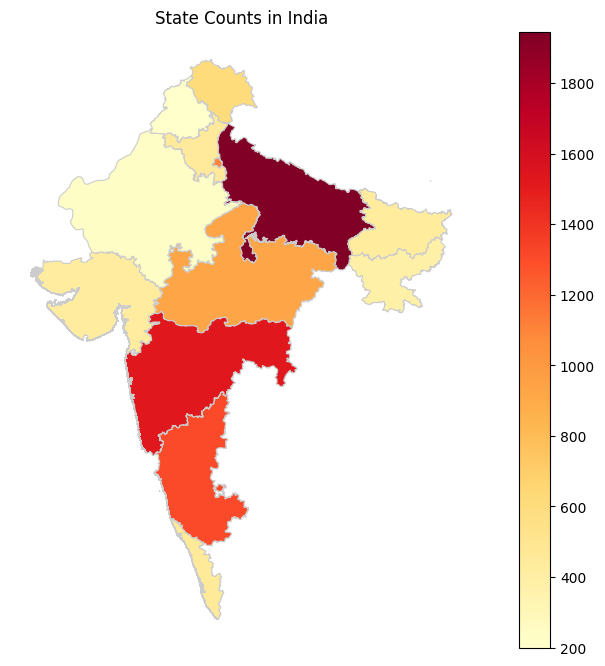

In [41]:
merged_data = india_map.merge(state_counts, left_on='NAME_1', right_on='State', how='left')

# Create a choropleth map using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='Count', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('State Counts in India')
ax.set_axis_off()
plt.show()



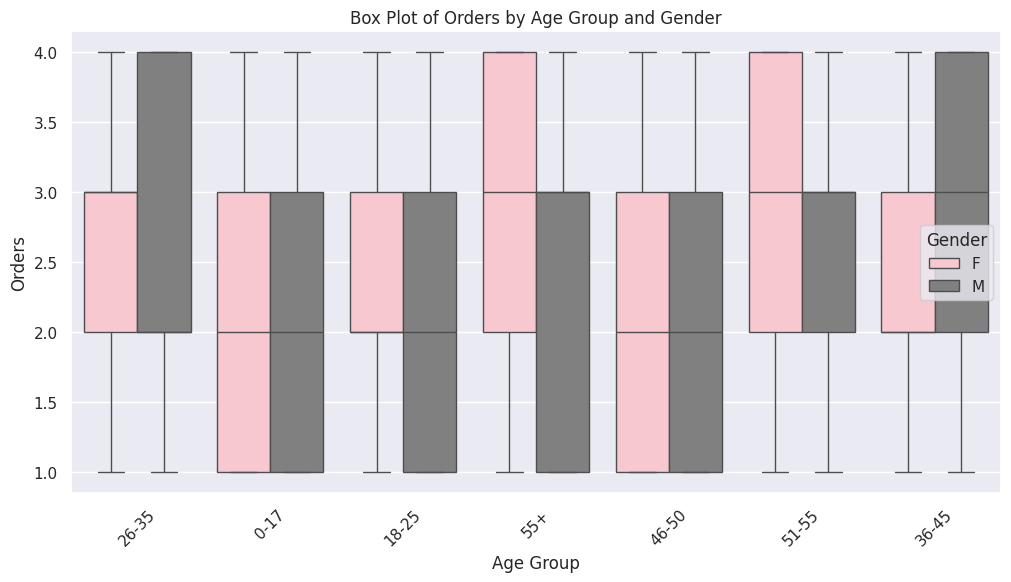

In [43]:
# Create a box plot
sns.set(style="whitegrid")
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.boxplot(
    data=df,
    x='Age Group',
    y='Orders',
    hue='Gender',
    palette={'F': 'pink', 'M': 'gray'}
)

# Customize the chart
plt.xlabel('Age Group')
plt.ylabel('Orders')
plt.title('Box Plot of Orders by Age Group and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

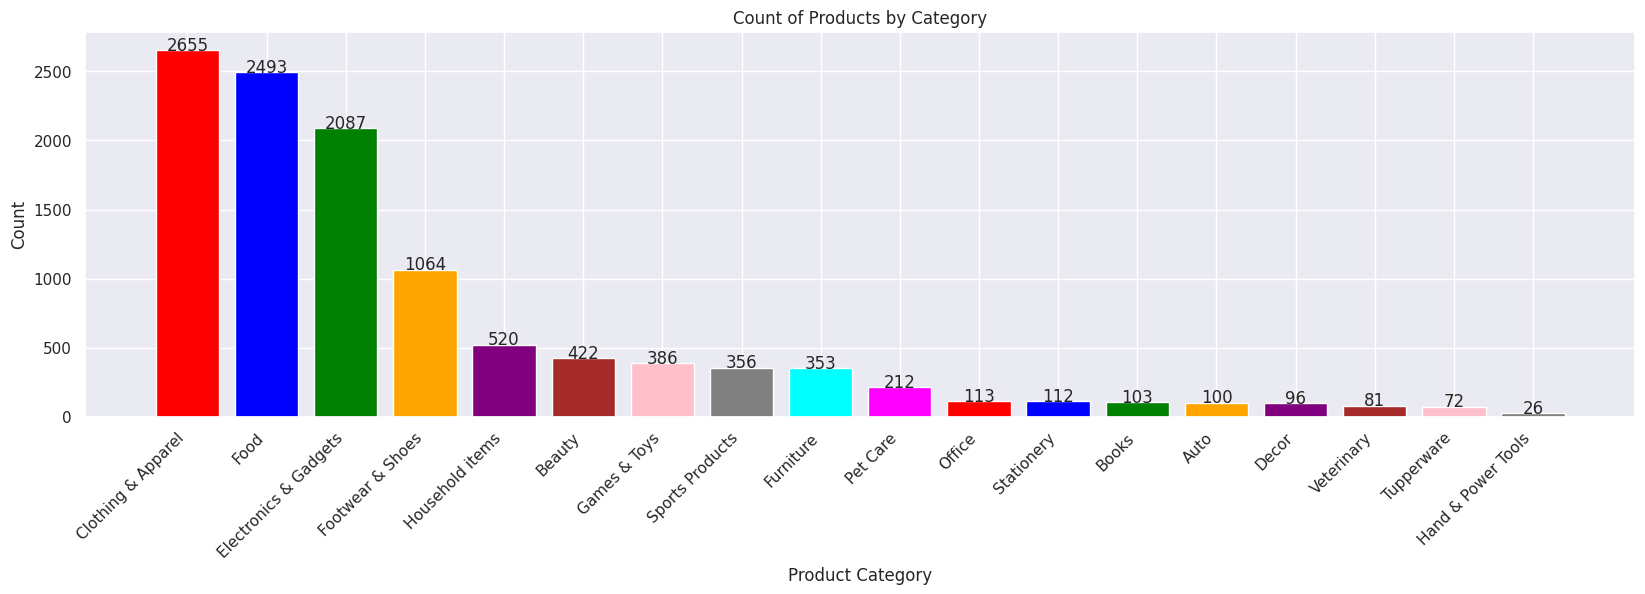

In [47]:
import matplotlib.pyplot as plt

# Create a list of colors for each bar
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Create the bar plot using matplotlib
plt.figure(figsize=(20, 5))
plt.bar(df['Product_Category'].value_counts().index, df['Product_Category'].value_counts().values, color=colors)
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Count of Products by Category')

# Add labels to each bar
for i, v in enumerate(df['Product_Category'].value_counts().values):
  plt.text(i, v + 0.5, str(v), ha='center')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.show()


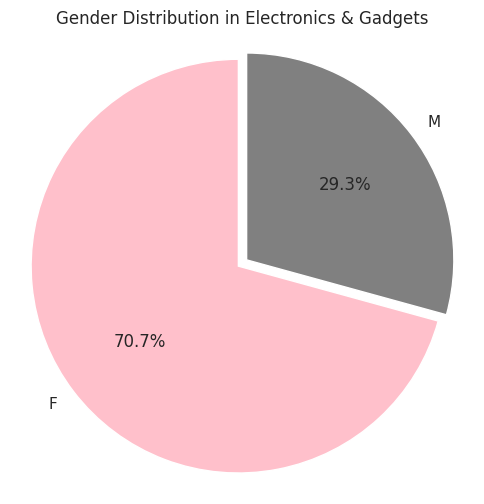

In [49]:
import matplotlib.pyplot as plt

# Filter the data for the "Electronics & Gadgets" product category
electronics_data = df[df['Product_Category'] == 'Electronics & Gadgets']

# Count the occurrences of each gender in this category
gender_counts = electronics_data['Gender'].value_counts()

# Define colors for the pie chart
colors = ['pink', 'gray']  # 'F' for pink and 'M' for gray

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0))

# Customize the chart
plt.title('Gender Distribution in Electronics & Gadgets')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Display the chart
plt.show()

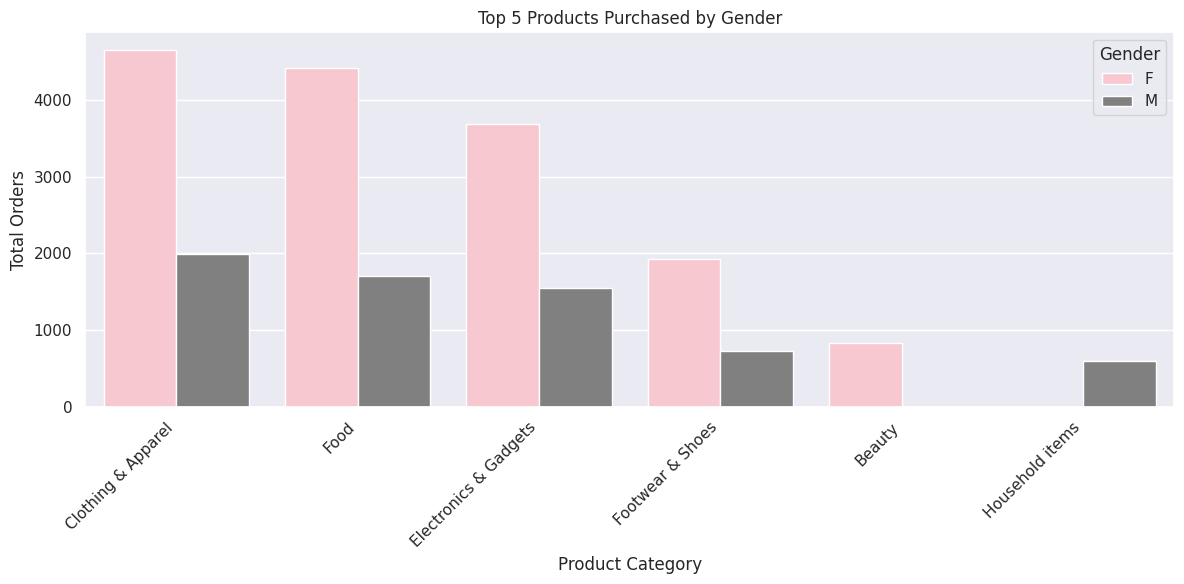

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by Gender and Product Category, and sum the Orders
gender_product_orders = df.groupby(['Gender', 'Product_Category'])['Orders'].sum().reset_index()

# Get the top 5 products for each gender
top5_products_female = gender_product_orders[gender_product_orders['Gender'] == 'F'].nlargest(5, 'Orders')
top5_products_male = gender_product_orders[gender_product_orders['Gender'] == 'M'].nlargest(5, 'Orders')

# Combine the top 5 products for each gender
top5_products = pd.concat([top5_products_female, top5_products_male])

# Plot the top 5 products by gender
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Product_Category', y='Orders', hue='Gender', data=top5_products, palette={'F': 'pink', 'M': 'gray'})

# Customize the plot
plt.title('Top 5 Products Purchased by Gender')
plt.xlabel('Product Category')
plt.ylabel('Total Orders')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')

# Show the plot
plt.tight_layout()
plt.show()

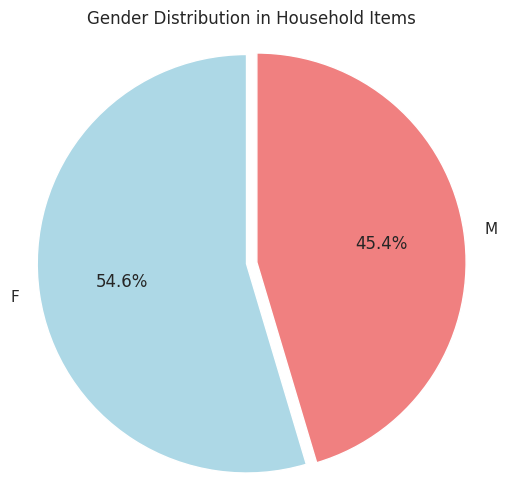

In [51]:
import matplotlib.pyplot as plt

# Filter the data for the "Household Items" product category
household_data = df[df['Product_Category'] == 'Household items']

# Count the occurrences of each gender in this category
gender_counts = household_data['Gender'].value_counts()

# Define colors for the pie chart
colors = ['lightblue', 'lightcoral']  # You can adjust these colors as desired

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, explode=(0.05, 0))

# Customize the chart
plt.title('Gender Distribution in Household Items')
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle.

# Display the chart
plt.show()

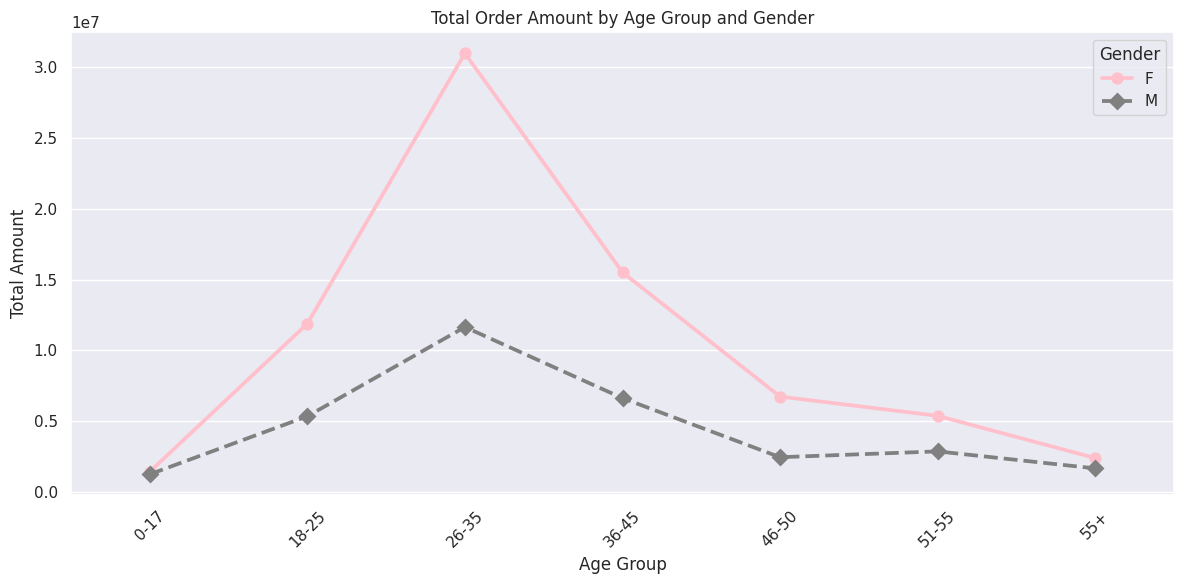

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by Age Group and Gender, then sum the Amount
age_gender_amount = df.groupby(['Age Group', 'Gender'])['Amount'].sum().reset_index()

# Create a point plot with custom colors
plt.figure(figsize=(12, 6))
sns.pointplot(data=age_gender_amount, x='Age Group', y='Amount', hue='Gender',
              palette={'F': 'pink', 'M': 'gray'}, markers=["o", "D"], linestyles=["-", "--"])

# Customize the plot
plt.title('Total Order Amount by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Show the plot
plt.tight_layout()
plt.show()

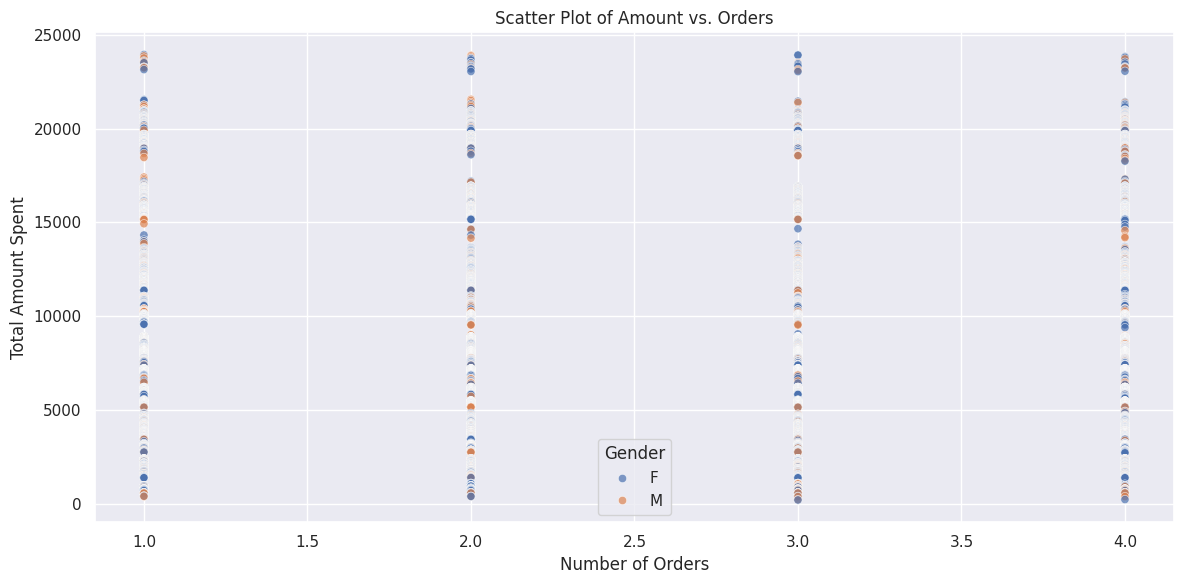

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a scatter plot to show the relationship between Amount and Orders
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Orders', y='Amount', hue='Gender',  alpha=0.7)

# Customize the plot
plt.title('Scatter Plot of Amount vs. Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Total Amount Spent')
plt.legend(title='Gender')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

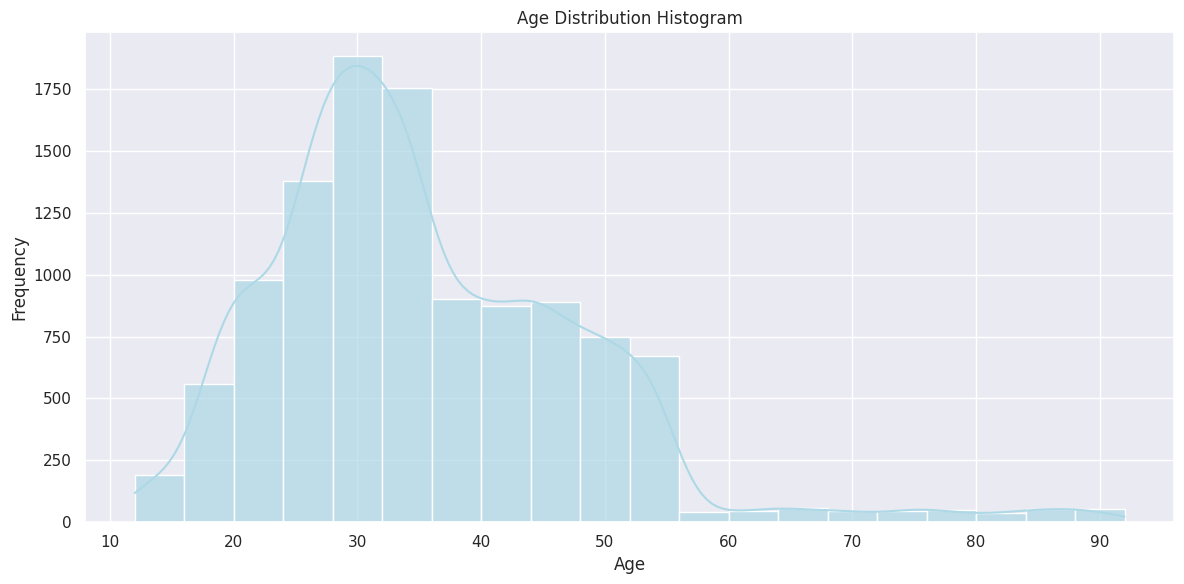

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram to show the age distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='lightblue', alpha=0.7)

# Customize the plot
plt.title('Age Distribution Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()